# **OmniComm Telecom Customer Churn**
## AAI-510-04 Group 1 - Final Project
#### **Members**
* Carrie Little
* Devin Eror
* Jasper A. Dolar

__[Project GitHub Repository](https://github.com/jasperdolar/AA1510)__

# Import Necessary Libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

#train/test/split and StandardScaler libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Model 1 - Logistic Regression - libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Model 2 - Random Forest - libraries
from sklearn.ensemble import RandomForestClassifier

#Model 3 - XGBoost - Libraries
from xgboost import XGBClassifier

#Model 4- SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# Load The Dataset

In [2]:
# Load the dataset
file_path = Path("..") / "data" / "telco_customer_churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Processing, Cleaning, and Feature 

In [3]:
#DATA PROCESSING, CLEANING, AND FEATURE
#clean and process the dataset

#drop customerID column since it's a unique identifier
#and not very helpful for prediction
df.drop("customerID", axis=1, inplace=True)

#make sure - so convert - the 'TotalCharges column to numeric
#to ensure it can be used in modeling
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

#handle missing values in "TotalCharges" by filling with the median
#this is to help maintain integrity of the dataset
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
#convert variable target "Churn" to binary format
#where Yes = 1, No = 0
#this allows us to use classification models
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Plot Visualizations

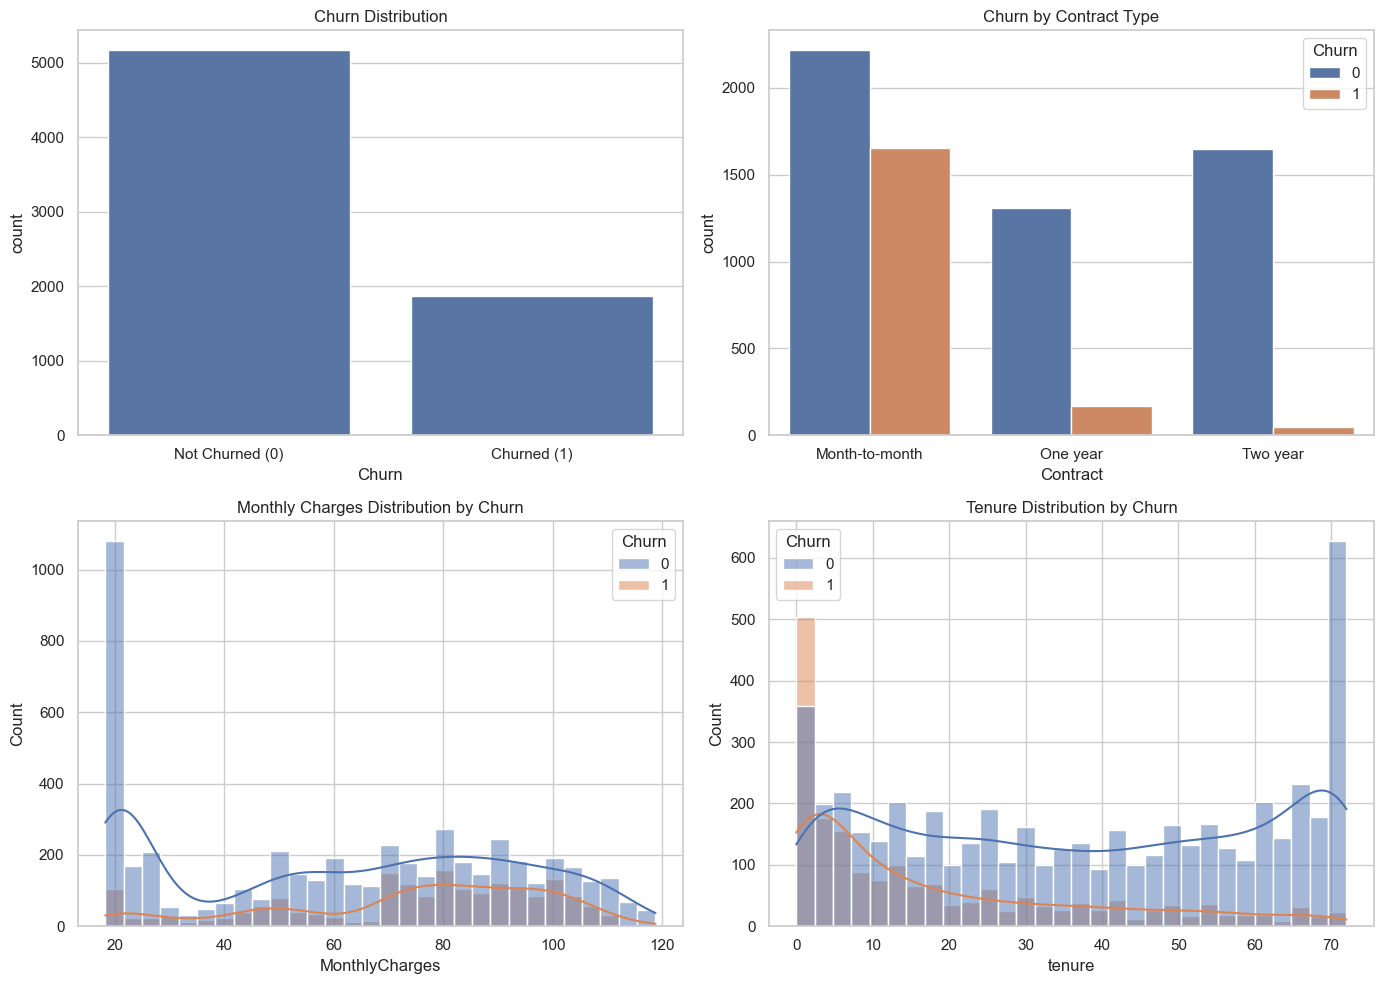

In [4]:
#Visualizations
sns.set(style="whitegrid")

#subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Plot 1: Churn distribution
ax = axes[0,0]
sns.countplot(x="Churn",data=df, ax=axes[0,0])
axes[0, 0].set_title("Churn Distribution")
ax.set_xticks([0, 1]) 
axes[0, 0].set_xticklabels(["Not Churned (0)", "Churned (1)"])

#Plot 2: Contract type vs churn
sns.countplot(x="Contract", hue="Churn", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Churn by Contract Type")
axes[0, 1].legend(title="Churn")

#Plot 3: Monthly Charges Distribution by Churn
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Monthly Charges Distribution by Churn")

#Plot 4: Tenure vs Churn
sns.histplot(data=df, x="tenure", hue="Churn", bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Tenure Distribution by Churn")

plt.tight_layout()
plt.show()

## Intepret Visualizations

Visualizations & Interpretations
Churn distribution: the dataset is not balanced, with noticeably more customers not churning than churning. This imbalance must be considered when selecting models and evaluation metrics.

Churn by contract type:
Customers with month-to-month contracts churn at much
higher rates than those with one-year or two-year contracts.
This suggests contract length is a strong predictor of churn

Monthly Charges Distribution by Churn:
Customers who churn tend to have slightly higher monthly charges
compared to those who stay.  There appears to be a churn 
concentration in mid-to-high charge ranges.

Tenure Distribution by Churn:
Customers with shorter tenures are more likely to churn,
which may indicate that customer loyalty and length of service
reduce churn risk.

# One-hot Encode

In [5]:
#one-hot encode
#encode categorial values -- convert categorical columns into
#binary variables.  This is needed because many ML models 
#work only with numeric input

df_encoded = pd.get_dummies(df, drop_first=True)

## Check Shape

In [6]:
#check shape after one-hot encoding above
df_encoded.shape
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Train-Test Split and Feature Scaling

In [7]:
#TRAIN-TEST SPLIT AND FEATURE SCALING

#split dataset into features (X) and target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

#split data into training and testing sets
#80% train, 20% test, random_state = 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Models

## Model 1 = Logistic Regression

### Train and Evaluate Model 1

In [8]:
#Model 1: Logistic Regression
#Train and Evaluate Model 1
#initialize logistic regression model 
#set max number of iterations to 10000 the solver will run
#while trying to find the best fit for the logistic regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)

#train model on scaled training data
model_lr.fit(X_train_scaled, y_train)

#predict on test data
y_pred_lr = model_lr.predict(X_test_scaled)

#evaluate the model's performance
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, 
                             target_names = ["Not Churned - 0",
                             "Churned - 1"]))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_lr))

Confusion Matrix
[[933 103]
 [151 222]]

Classification Report:
                 precision    recall  f1-score   support

Not Churned - 0       0.86      0.90      0.88      1036
    Churned - 1       0.68      0.60      0.64       373

       accuracy                           0.82      1409
      macro avg       0.77      0.75      0.76      1409
   weighted avg       0.81      0.82      0.82      1409


Accuracy Score:
0.8197303051809794


### Interpretation/Analysis

#### Model 1: Logistic Regression
#### Interpretation/Analysis

##### Confusion Matrix:
* 933 - Customers who did not churn and were correctly predicted as "not churned" (true negatives)
* 103 - customers who did not churn, but the model incorrectly predicted "not churn" (false positives)
* 151 - customers who did churn, but the model failed to identify them (false negatives)
* 222 - customers who churned and were correctly predicted as such (true positives)

##### The Logistic Regression model achieved:
* an overall accuracy of 82%.

##### The model performs well at identifying customers who are NOT likely to churn (Not Churned - 0) with:
* Precision: 0.86 (refers to how many predicted non-churnes were actually correct)
* Recall: 0.90 (refers to how many actual non-churners were correctly identified)
* F1-Score: 0.88 (this is the harmonic mean of precision and recall, balancing both pretty well - higher the better)

##### Performance seems week on predicting churners (Class 1):
* Precision: 0.68 (some predicted churners were false positives)
* Recall: 0.60 (only 60% of actual churners were detected)
* F1-Score: 0.64 (overall effectiveness in capturing churners is moderate - just okay - higher the better)

The imbalance could be indicative that the model is better
at identifying customers will not churn (will stay) than those
likely to leave (churners).  Since churn prediction is 
a class imbalance project, we will want to explore more 
powerful/better models next (such as Random Forest, 
and XGBoost), and look at metrics beyond accuracy such as 
recall for churned customers.

## Model 2- Random Forest Classifier

### Train and Evaluate Model 2

In [9]:
#MODEL 2 = TRAIN AND EVALUATE MODEL 2
#MODEL: Random Forest Classifier

#initialize Random Forest Model
#will build 100 decision trees n_estimators=100
#each tree is trained on a different bootstrap sample of the training data.
#final prediction is determined by majority voting (for classification)
#generally, more trees improve performance and stability but have a longer computation time

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

#train model on scaled training data
model_rf.fit(X_train_scaled, y_train)

#predict on test data
y_pred_rf = model_rf.predict(X_test_scaled)

#evaluate the model's performance
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_rf,
                            target_names = ["Not Churned - 0",
                                            "Churned - 1"]))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Confusion Matrix
[[942  94]
 [202 171]]

Classification Report: 
                 precision    recall  f1-score   support

Not Churned - 0       0.82      0.91      0.86      1036
    Churned - 1       0.65      0.46      0.54       373

       accuracy                           0.79      1409
      macro avg       0.73      0.68      0.70      1409
   weighted avg       0.78      0.79      0.78      1409


Accuracy Score:
0.7899219304471257


### Interpretation/Analysis

#### Model 2: Random Forest 
#### Interpretation / Analysis

##### Confusion Matrix:
* 942 = customers who did not churn and the model correctly predicted "not churn" (true negatives)
* 94 = customers who did not churn but the model incorrectly predicted "churn" (false positives)
* 202 = customers who did not churn but the model predicted "not churn" (false negatives)
* 171 = customers who did churn and the model predicted "churn" (true positives)

The Random Forest model achieved an accuracy of about 79%,
which is slighly lower than Logistic Regression.
 
##### The model seems to continue to perform well at identifying customers who are not likely to churn (Class 0):
* Precision: 0.82 (refers to how many predicted non-churners were actually correct)
* Recall: 0.91 (refers to how many actual non-churners were correctly identified)
* F1-Score: 0.86 (balances both this is the harmonic mean of precision and recall, higher is better )

##### However, the model's performance on predicting churners (Class 1) is noticeably weaker:
* Precision: 0.65 (fair number of false positives)
* Recall: 0.46 (less than half of actual churners were detected)
* F1-Score: 0.54 (this indicates bad overall performance on churn prediction, higher the better)

Overall, the Random Forest slightly underperforms compared to Logistic Regression
in terms of identifying churners.  
It performs well for non-churners but still seem to struggle
to catch customers who actually leave (churners).

### Feature Importance Using Random Forest

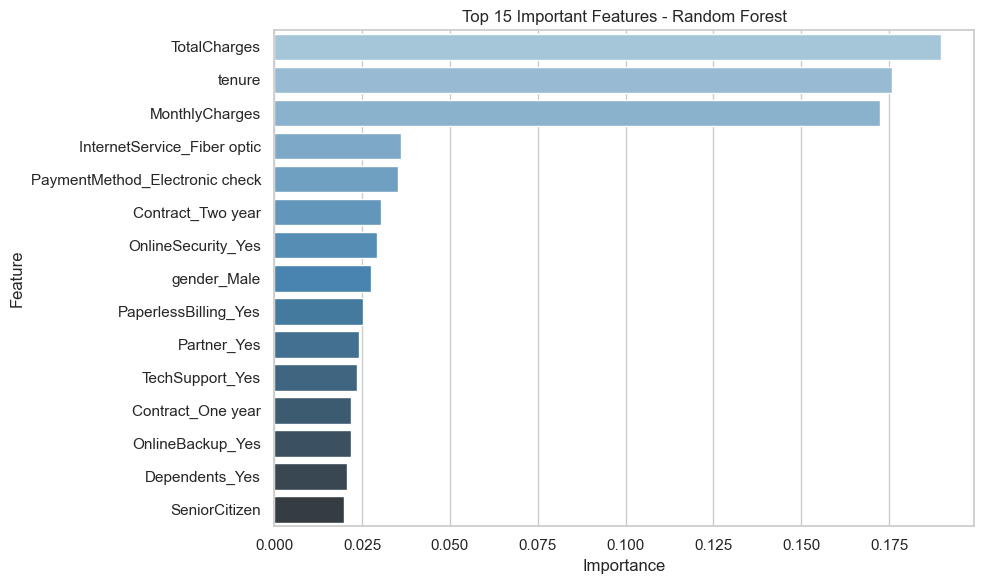

In [10]:
#Feature Importance Using Random Forest

#Get feature importances
importances = model_rf.feature_importances_
feature_names = X.columns

#create DataFrame for better plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

#plot top 15 most important features
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", 
    y="Feature", 
    data=feat_importance_df.head(15),
    hue="Feature", 
    palette="Blues_d")
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()

The Random Forest model highlights the most influential features
in predicting customer churn:
* TotalCharges, tenure, and MonthlyCharges are the top three
predictors - these financial and engagement metrics strongly influence 
whether a customer stays or leaves.
* Fiber optic internet and electronic check payments are associated
with higher churn risk, possibly because of cost-sensitive or less 
satisfied customer segments.
* Contract type (especially two-year contracts) and services like
OnlineSecurity and TechSUpport also impact churn - longer commitments
and added support seem to reduce the risk of churn.
* Demographics like gender and SeniorCitizens have low impact compared
to service-related and billing features.

-------
These insights from the plots can help the business 
focus retention efforts on customers with high charges,
short tenure, and less stable contract or payment setups.

## Model 3- XGBoost Classifier

### Train and Evaluate Model 3

In [11]:
#MODEL 3 = TRAIN AND EVALUATE MODEL 3
#MODEL: XGBoost Classifier

#Initialize XGBoost model
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

#train model on scaled training data
model_xgb.fit(X_train_scaled, y_train)

#predict on test data
y_pred_xgb = model_xgb.predict(X_test_scaled)

#evaluate the model's performance
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred_xgb,
                            target_names = ["Not Churned -0",
                                            "Churned - 1"]))

print("\nAccuracy Score: ")
print(accuracy_score(y_test, y_pred_xgb))

Confusion Matrix
[[925 111]
 [173 200]]

Classification Report: 
                precision    recall  f1-score   support

Not Churned -0       0.84      0.89      0.87      1036
   Churned - 1       0.64      0.54      0.58       373

      accuracy                           0.80      1409
     macro avg       0.74      0.71      0.73      1409
  weighted avg       0.79      0.80      0.79      1409


Accuracy Score: 
0.7984386089425124


### Interpretation/Analysis

#### Model 3: XGBoost Classifier
#### Interpretation / Analysis

Confusion Matrix:

* 926 - correctly predicted customers who did not "churn" (true negatives)
* 110 - customers who were predicted to churn but did not (false positives)
* 187 - customers who actually churned, but were missed by the model (false negatives)
* 186 - correctly predicted customers who did churn (true positives)

The XGBoost model achieved an accuracy of about 79%, similar to the Random Forest model.

##### Performance for non-churners (Class 0) remains strong:
* Precision: 0.83 (most predicted non-churners actually non-churners)
* Recall: 0.89 (89% of actual non-churners were correctly identified)
* F1-Score: 0.86 (good balance between precision and recall)

##### Performance for churners (Class 1) is lightly better than Random Forest:
* Precision: 0.63 (moderate false positives)
* Recall: 0.50 (half of actual churners were correctly identified)
* F1-Score: 0.56 (slightly better than Random Forest's 0.54)

Overall, XGBoost performs comparably to Random Forest in overall accuracy, 
but slightly better in detecting churners (higher F1-score for Class 1).
However, it still shows room for improvement in recall for churners,
suggesting a need to explore class imbalance handling in future iterations.


## Model 4- Tuned Support Vector Machines Model (SVM)

### Train and Evaluate Model 4

#### Reload Dataset

In [12]:
# Load the dataset
file_path = Path("..") / "data" / "telco_customer_churn.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Model 4 - Preprocessing


Missing values after conversion of TotalCharges:


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Churn distribution:


No     5174
Yes    1869
Name: Churn, dtype: int64

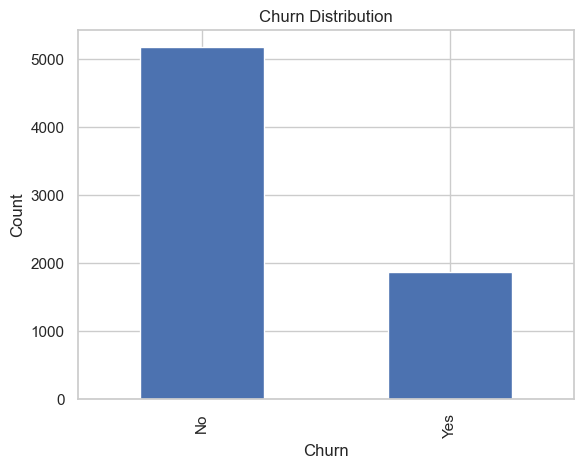

In [13]:
# Convert 'TotalCharges' to numeric and handle any non-numeric entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nMissing values after conversion of TotalCharges:")
display(df.isnull().sum())

# Fill missing TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Distribution of target variable
print("\nChurn distribution:")
display(df['Churn'].value_counts())

plt.figure()
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# ## Preprocessing
# Drop the customerID column
df_model = df.drop('customerID', axis=1)

# Encode categorical variables
cat_cols = df_model.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])

# Feature matrix and target vector
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Best parameters: {'svc__C': 0.1, 'svc__gamma': 0.01}
✔️ Best CV recall: 0.820066889632107

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1035
           1       0.48      0.82      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.72      0.74      1409


Accuracy Score:
0.7189496096522356


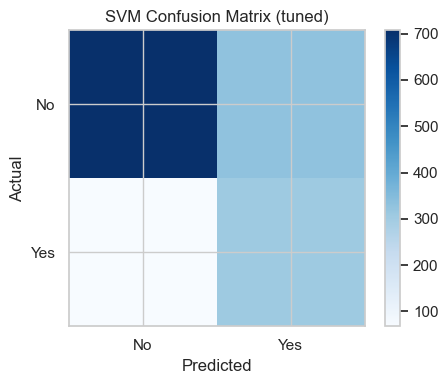

In [14]:
# 1) FEATURE ENGINEERING

df_model['tenure_contract'] = df_model['tenure'] * df_model['Contract']

# 2) TRAIN/TEST SPLIT
from sklearn.model_selection import train_test_split

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) PIPELINE + GRID SEARCH
# --------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, classification_report, confusion_matrix

# Build a simple pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(class_weight='balanced', probability=True, random_state=42))
])

# Define grid of C and γ to search
param_grid = {
    'svc__C':     [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 0.01, 0.1, 1, 10]
}

# Use recall on the churn (positive) class as our objective
recall_scorer = make_scorer(recall_score, pos_label=1)

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid.fit(X_train, y_train)

print("🔍 Best parameters:", grid.best_params_)
print("✔️ Best CV recall:", grid.best_score_)

# 4) EVALUATE ON THE TEST SET
# ---------------------------
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('SVM Confusion Matrix (tuned)')
plt.colorbar()
plt.xticks([0,1], ['No','Yes'])
plt.yticks([0,1], ['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Interpretation/Analysis

#### SVM Model Evaluation & Interpretation

##### Hyperparameter Tuning Results:
- **Best parameters:** `C = 0.1`, `gamma = 0.01`  
- **Best CV recall (class 1):** 0.8201  

##### Overall Accuracy is 0.72  

##### Class-wise Metrics

| Class      | Precision | Recall | F₁-Score | Support |
|------------|:---------:|:------:|:--------:|:-------:|
| **No (0)** |   0.91    |  0.68  |   0.78   |  1 035  |
| **Yes (1)**|   0.48    |  0.82  |   0.61   |   374   |

##### Confusion Matrix

|               | Predicted No | Predicted Yes | Total |
|---------------|:------------:|:-------------:|:-----:|
| **Actual No** |     704      |      331      | 1 035 |
| **Actual Yes**|      67      |      307      |  374  |

- **True Positives (307):** correctly flagged churners  
- **False Negatives (67):** churners missed (18% of churners)  
- **False Positives (331):** stayers flagged (32% of non-churners)  
- **True Negatives (704):** correctly identified stayers  

##### Interpretation
- **Recall↑ for churners:** catch ~82% of at-risk customers.  
- **Precision↓ for churners:** 0.48; roughly half of flagged customers wouldn’t have churned.  
- **Trade-off:**  
  - If **missing churners** is costlier than extra outreach, this higher recall is a win.  
  - If **outreach cost** is high, the drop in precision may be too expensive.  


# Model Comparison Summary

## Model Comparison Summary (still need to add SVM Model Data)

|  Metric                       | Logistic Regression | Random Forest    | XGBoost      | SVM          |
|-------------------------------|:-------------------:|:----------------:|:------------:|:------------:|
| **Accuracy**                     |         81.97%      |      78.99%      |   79.84%     |  71.89%  |
| **Precision (Class 1 - Churned)**|         0.68        |      0.65        |   0.63       |  0.48  |
| **Recall (CLass 1 - Churned)**   |         0.60        |      0.46        |   0.50       |  0.82  |
| **F1-Score (Class 1 - Churned)** |         0.64        |      0.54        |   0.56       |  0.61 |


Logistic Regression achieved the highest recall and F1-Score
for predicting churned customers, which is crucial in churn 
prediction where false negatives (missed churners) are costly.

Random Forest and XGBoost performed similarly in terms of overall
accuracy but had weaker recall and F1-Scores on the churn class.

Even when tuned, the Support Vector Machine (SVM) model had poor accuracy. 
Its recall is higher than that of other models, as it flags 82% of at-risk customers for churn. 
Its precision is at 48% for incorrectly flagging at-risk for churn customers.

While Random Forest, XGBoost, and SVM offer model complexity and robustness,
Logistic Regression provided a better sensitivity (recall) and balance 
for churn detection.

# Final Conclusion

In this project, we built and evaluated four machine learning
models: Logistic Regression Random Forest, XGBoost andSVM in order to 
predict customer churn the telecommunications industry using the 
IBM Telco Customer Churn Dataset.  Our goal was to help the business
identity which customers are likelty to leave, so retention department
can be proactively applied.

# Deployment Plan

To turn this customer churn prediction model into a usable
business tool, we propose a batch deployment approach integrated
into the company's existing analytics system.
The goal is to flag potentially churn-prone customers on a regular
schedule (say weekly or monthly), enabling the retention team to
timely intervene 

# References